In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

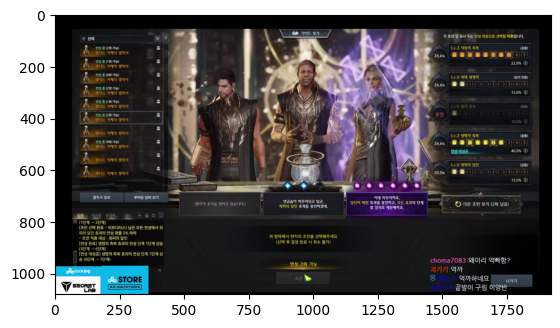

In [3]:
img = Image.open('data/raw/done/[23_3_16] 패치 적용 하스스톤 전장, 로스트아크 숙제, 엘릭서 I 포셔의 풀영상.mp4_051948.467.png')
raw_img_np = np.array(img)
plt.imshow(raw_img_np)

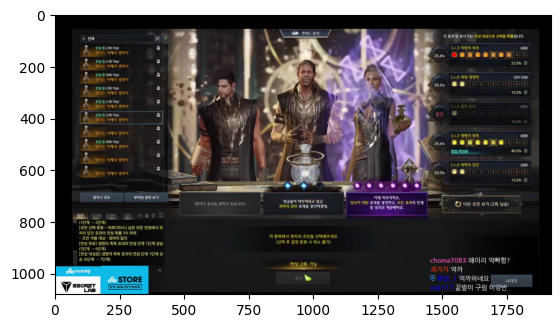

In [3]:
img_np = raw_img_np.copy()
left_top = (157,1542) # (h,w)
right_bottom = (608,1813) # (h,w)
width = right_bottom[1] - left_top[1]
height = right_bottom[0] - left_top[0]
per_slot_width_ratio = 15/width
abs_slot_width = int(per_slot_width_ratio*width)
per_slot_height_ratio = 15/height
abs_slot_height = int(per_slot_height_ratio*height)
img_np[left_top[0]-abs_slot_height//2:left_top[0]+abs_slot_height//2, left_top[1]-abs_slot_width//2:left_top[1]+abs_slot_width//2] = [255,0,0]
plt.imshow(img_np)

In [4]:
print(per_slot_height_ratio, per_slot_width_ratio)

0.03325942350332594 0.055350553505535055


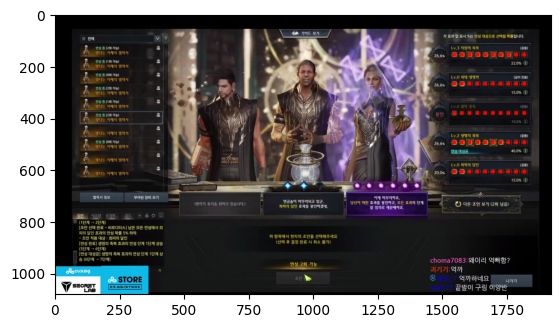

In [5]:
slot_spacing_width = width/9
slot_spacing_height = height/4
for i in range(10):
    for j in range(5):
        img_np[left_top[0]+int(j*slot_spacing_height)-abs_slot_height//2:left_top[0]+int(j*slot_spacing_height)+abs_slot_height//2, left_top[1]+int(i*slot_spacing_width)-abs_slot_width//2:left_top[1]+int(i*slot_spacing_width)+abs_slot_width//2] = [255,0,0]
plt.imshow(img_np)

[[220 220 201 220 218 183 217 186  42  40]
 [211 211  33  28  26  41  27  42  42  38]
 [106  17  18  16  16  21  17  21  21  21]
 [219 218 194 218 216 187 219  38  41  39]
 [209 211  32  25  25  38  27  42  44  43]]


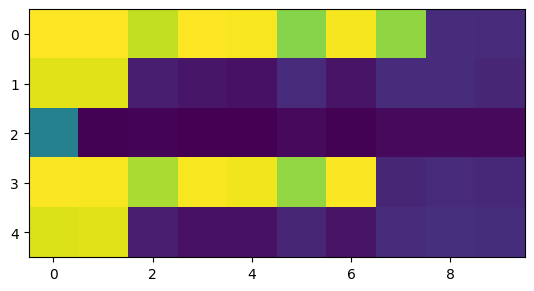

In [6]:
img_np = raw_img_np.copy()
color_average = np.zeros((5,10,3))
for i in range(10):
    for j in range(5):
        color_average[j,i] = np.mean(img_np[left_top[0]+int(j*slot_spacing_height)-abs_slot_height//2:left_top[0]+int(j*slot_spacing_height)+abs_slot_height//2, left_top[1]+int(i*slot_spacing_width)-abs_slot_width//2:left_top[1]+int(i*slot_spacing_width)+abs_slot_width//2], axis=(0,1))
plt.imshow(color_average[:,:,0].astype(np.uint8))
print(color_average[:,:,0].astype(np.uint8))

In [7]:
prob_top_center = (160, 1485)
prob_width = 50
prob_width_to_slot_width_ratio = prob_width/width
abs_prob_width = int(prob_width_to_slot_width_ratio*width)
prob_height = 20
prob_height_to_slot_height_ratio = prob_height/height
abs_prob_height = int(prob_height_to_slot_height_ratio*height)

prob_slot_center_diff_h = int(prob_top_center[0] - left_top[0])
prob_slot_center_diff_w = int(prob_top_center[1] - left_top[1])
prob_slot_center_diff_h_to_slot_height_ratio = prob_slot_center_diff_h/height
prob_slot_center_diff_w_to_slot_width_ratio = prob_slot_center_diff_w/width
abs_prob_slot_center_diff_h = int(prob_slot_center_diff_h_to_slot_height_ratio*height)
abs_prob_slot_center_diff_w = int(prob_slot_center_diff_w_to_slot_width_ratio*width)
print(prob_slot_center_diff_h_to_slot_height_ratio, prob_slot_center_diff_w_to_slot_width_ratio)

0.0066518847006651885 -0.21033210332103322


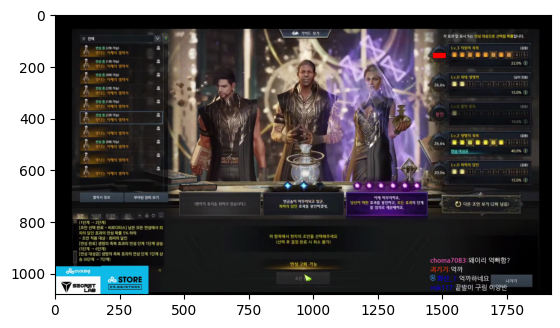

In [8]:
img_np = raw_img_np.copy()
img_np[prob_top_center[0]-abs_prob_height//2:prob_top_center[0]+abs_prob_height//2, prob_top_center[1]-abs_prob_width//2:prob_top_center[1]+abs_prob_width//2] = [255,0,0]
plt.imshow(img_np)

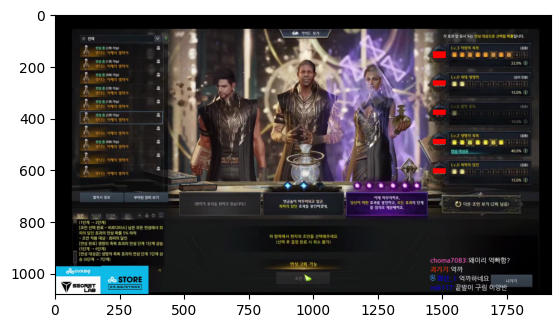

In [9]:
for i in range(5):
    img_np[left_top[0]+int(i*slot_spacing_height)-abs_prob_slot_center_diff_h-abs_prob_height//2:left_top[0]+int(i*slot_spacing_height)-abs_prob_slot_center_diff_h+abs_prob_height//2, prob_top_center[1]-abs_prob_width//2:prob_top_center[1]+abs_prob_width//2] = [255,0,0]
plt.imshow(img_np)

[1.00021546 0.96802113 1.43136302 0.9806972  1.06302967]


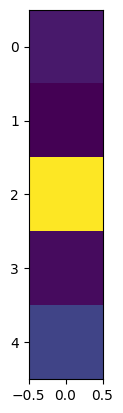

In [10]:
img_np = raw_img_np.copy()
prob_color_average = np.zeros((5,3))
for i in range(5):
    prob_color_average[i] = np.mean(img_np[left_top[0]+int(i*slot_spacing_height)-abs_prob_slot_center_diff_h-abs_prob_height//2:left_top[0]+int(i*slot_spacing_height)-abs_prob_slot_center_diff_h+abs_prob_height//2, prob_top_center[1]-abs_prob_width//2:prob_top_center[1]+abs_prob_width//2], axis=(0,1))
red_blue_ratio = prob_color_average[:,0]/prob_color_average[:,1]
plt.imshow(red_blue_ratio.reshape(5,1))
print(red_blue_ratio)

In [11]:
adv_1_top_left = (698,489)
adv_1_bottom_right = (766,787)
adv_1_top_left_to_slot_top_left_ratio_h = (adv_1_top_left[0] - left_top[0])/height
adv_1_top_left_to_slot_top_left_ratio_w = (adv_1_top_left[1] - left_top[1])/width
adv_1_bottom_right_to_slot_top_left_ratio_h = (adv_1_bottom_right[0] - left_top[0])/height
adv_1_bottom_right_to_slot_top_left_ratio_w = (adv_1_bottom_right[1] - left_top[1])/width
print(adv_1_bottom_right_to_slot_top_left_ratio_h, adv_1_bottom_right_to_slot_top_left_ratio_w)

1.3503325942350333 -2.7859778597785976


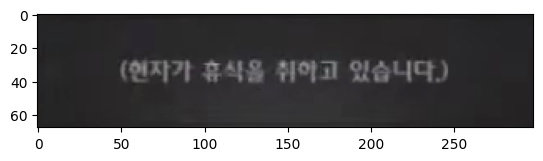

In [12]:
img_np = raw_img_np.copy()
abs_adv_1_top_left = (int(adv_1_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_1_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_adv_1_bottom_right = (int(adv_1_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_1_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
plt.imshow(img_np[abs_adv_1_top_left[0]:abs_adv_1_bottom_right[0], abs_adv_1_top_left[1]:abs_adv_1_bottom_right[1]])


In [13]:
adv_2_top_left = (698, 812)
adv_2_bottom_right = (766, 1110)
adv_2_top_left_to_slot_top_left_ratio_h = (adv_2_top_left[0] - left_top[0])/height
adv_2_top_left_to_slot_top_left_ratio_w = (adv_2_top_left[1] - left_top[1])/width
adv_2_bottom_right_to_slot_top_left_ratio_h = (adv_2_bottom_right[0] - left_top[0])/height
adv_2_bottom_right_to_slot_top_left_ratio_w = (adv_2_bottom_right[1] - left_top[1])/width
print(adv_2_bottom_right_to_slot_top_left_ratio_h, adv_2_bottom_right_to_slot_top_left_ratio_w)

1.3503325942350333 -1.5940959409594095


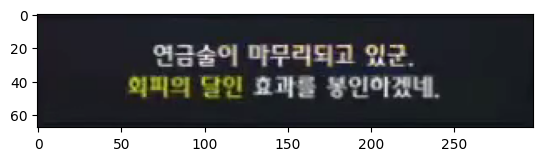

In [14]:
img_np = raw_img_np.copy()
abs_adv_2_top_left = (int(adv_2_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_2_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_adv_2_bottom_right = (int(adv_2_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_2_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
plt.imshow(img_np[abs_adv_2_top_left[0]:abs_adv_2_bottom_right[0], abs_adv_2_top_left[1]:abs_adv_2_bottom_right[1]])


In [15]:
adv_3_top_left = (698, 1133)
adv_3_bottom_right = (766, 1431)
adv_3_top_left_to_slot_top_left_ratio_h = (adv_3_top_left[0] - left_top[0])/height
adv_3_top_left_to_slot_top_left_ratio_w = (adv_3_top_left[1] - left_top[1])/width
adv_3_bottom_right_to_slot_top_left_ratio_h = (adv_3_bottom_right[0] - left_top[0])/height
adv_3_bottom_right_to_slot_top_left_ratio_w = (adv_3_bottom_right[1] - left_top[1])/width
print(adv_3_bottom_right_to_slot_top_left_ratio_h, adv_3_bottom_right_to_slot_top_left_ratio_w)

1.3503325942350333 -0.4095940959409594


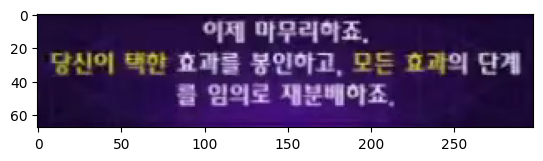

In [16]:
img_np = raw_img_np.copy()
abs_adv_3_top_left = (int(adv_3_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_3_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_adv_3_bottom_right = (int(adv_3_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_3_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
plt.imshow(img_np[abs_adv_3_top_left[0]:abs_adv_3_bottom_right[0], abs_adv_3_top_left[1]:abs_adv_3_bottom_right[1]])

In [17]:
enchant_n_top_left = (950,930)
enchant_n_bottom_right = (976,992)
enchant_n_top_left_to_slot_top_left_ratio_h = (enchant_n_top_left[0] - left_top[0])/height
enchant_n_top_left_to_slot_top_left_ratio_w = (enchant_n_top_left[1] - left_top[1])/width
enchant_n_bottom_right_to_slot_top_left_ratio_h = (enchant_n_bottom_right[0] - left_top[0])/height
enchant_n_bottom_right_to_slot_top_left_ratio_w = (enchant_n_bottom_right[1] - left_top[1])/width
print(enchant_n_bottom_right_to_slot_top_left_ratio_h, enchant_n_bottom_right_to_slot_top_left_ratio_w)

1.8159645232815964 -2.029520295202952


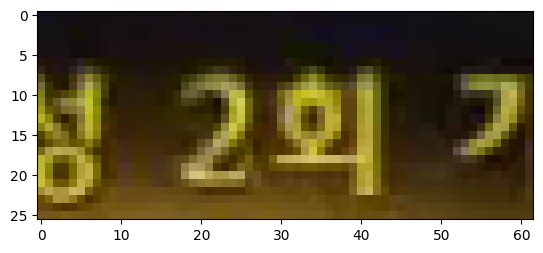

In [18]:
img_np = raw_img_np.copy()
abs_enchant_n_top_left = (int(enchant_n_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(enchant_n_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_enchant_n_bottom_right = (int(enchant_n_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(enchant_n_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
plt.imshow(img_np[abs_enchant_n_top_left[0]:abs_enchant_n_bottom_right[0], abs_enchant_n_top_left[1]:abs_enchant_n_bottom_right[1]])


In [22]:
import json
ratio_data = {
    "per_slot_height_ratio": per_slot_height_ratio,
    "per_slot_width_ratio": per_slot_width_ratio,
    "prob_width_to_slot_width_ratio": prob_width_to_slot_width_ratio,
    "prob_height_to_slot_height_ratio": prob_height_to_slot_height_ratio,
    "prob_slot_center_diff_h_to_slot_height_ratio":prob_slot_center_diff_h_to_slot_height_ratio,
    "prob_slot_center_diff_w_to_slot_width_ratio":prob_slot_center_diff_w_to_slot_width_ratio,
    "adv_1_top_left_to_slot_top_left_ratio_h": adv_1_top_left_to_slot_top_left_ratio_h,
    "adv_1_top_left_to_slot_top_left_ratio_w": adv_1_top_left_to_slot_top_left_ratio_w,
    "adv_1_bottom_right_to_slot_top_left_ratio_h": adv_1_bottom_right_to_slot_top_left_ratio_h,
    "adv_1_bottom_right_to_slot_top_left_ratio_w": adv_1_bottom_right_to_slot_top_left_ratio_w,
    "adv_2_top_left_to_slot_top_left_ratio_h": adv_2_top_left_to_slot_top_left_ratio_h,
    "adv_2_top_left_to_slot_top_left_ratio_w": adv_2_top_left_to_slot_top_left_ratio_w,
    "adv_2_bottom_right_to_slot_top_left_ratio_h": adv_2_bottom_right_to_slot_top_left_ratio_h,
    "adv_2_bottom_right_to_slot_top_left_ratio_w": adv_2_bottom_right_to_slot_top_left_ratio_w,
    "adv_3_top_left_to_slot_top_left_ratio_h": adv_3_top_left_to_slot_top_left_ratio_h,
    "adv_3_top_left_to_slot_top_left_ratio_w": adv_3_top_left_to_slot_top_left_ratio_w,
    "adv_3_bottom_right_to_slot_top_left_ratio_h": adv_3_bottom_right_to_slot_top_left_ratio_h,
    "adv_3_bottom_right_to_slot_top_left_ratio_w": adv_3_bottom_right_to_slot_top_left_ratio_w,
    "enchant_n_top_left_to_slot_top_left_ratio_h": enchant_n_top_left_to_slot_top_left_ratio_h,
    "enchant_n_top_left_to_slot_top_left_ratio_w": enchant_n_top_left_to_slot_top_left_ratio_w,
    "enchant_n_bottom_right_to_slot_top_left_ratio_h": enchant_n_bottom_right_to_slot_top_left_ratio_h,
    "enchant_n_bottom_right_to_slot_top_left_ratio_w": enchant_n_bottom_right_to_slot_top_left_ratio_w
}
with open("data/ratio_data.json", "w") as f:
    json.dump(ratio_data, f, indent=4)

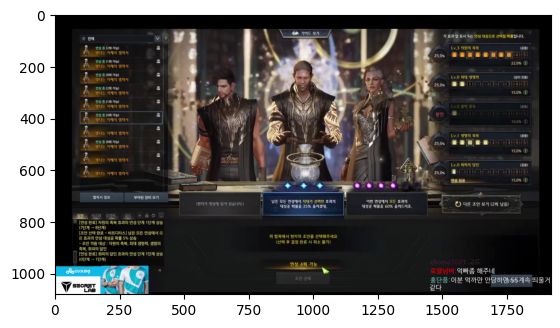

In [25]:
import json
with open("data/ratio_data.json", "r") as f:
    ratio_data = json.load(f)
img = Image.open('data/raw/done/[23_3_16] 패치 적용 하스스톤 전장, 로스트아크 숙제, 엘릭서 I 포셔의 풀영상.mp4_051921.922.png')
raw_img_np = np.array(img)
plt.imshow(raw_img_np)

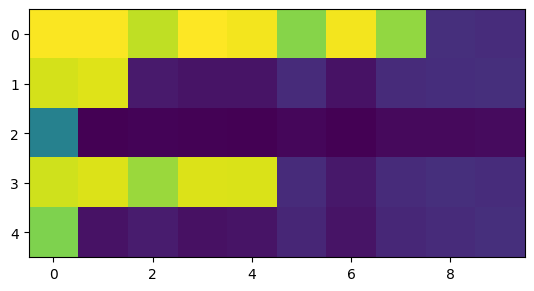

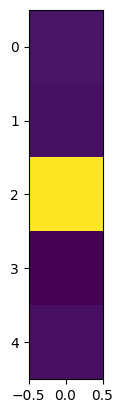

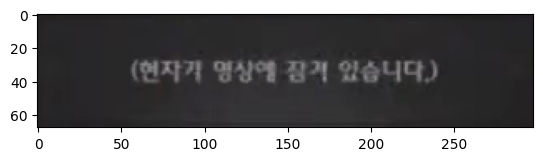

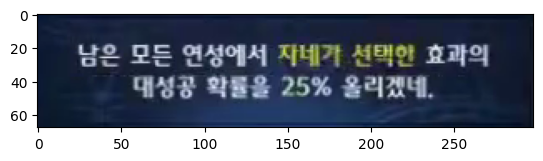

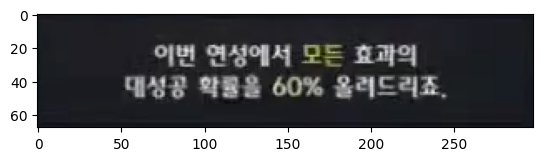

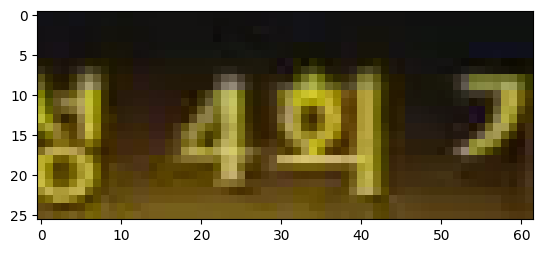

In [26]:
img_np = raw_img_np.copy()
left_top = (157,1542) # (h,w)
right_bottom = (608,1813) # (h,w)
height = right_bottom[0] - left_top[0]
width = right_bottom[1] - left_top[1]


per_slot_height_ratio = ratio_data["per_slot_height_ratio"]
per_slot_width_ratio = ratio_data["per_slot_width_ratio"]
prob_width_to_slot_width_ratio = ratio_data["prob_width_to_slot_width_ratio"]
prob_height_to_slot_height_ratio = ratio_data["prob_height_to_slot_height_ratio"]
prob_slot_center_diff_h_to_slot_height_ratio = ratio_data["prob_slot_center_diff_h_to_slot_height_ratio"]
prob_slot_center_diff_w_to_slot_width_ratio = ratio_data["prob_slot_center_diff_w_to_slot_width_ratio"]
adv_1_top_left_to_slot_top_left_ratio_h = ratio_data["adv_1_top_left_to_slot_top_left_ratio_h"]
adv_1_top_left_to_slot_top_left_ratio_w = ratio_data["adv_1_top_left_to_slot_top_left_ratio_w"]
adv_1_bottom_right_to_slot_top_left_ratio_h = ratio_data["adv_1_bottom_right_to_slot_top_left_ratio_h"]
adv_1_bottom_right_to_slot_top_left_ratio_w = ratio_data["adv_1_bottom_right_to_slot_top_left_ratio_w"]
adv_2_top_left_to_slot_top_left_ratio_h = ratio_data["adv_2_top_left_to_slot_top_left_ratio_h"]
adv_2_top_left_to_slot_top_left_ratio_w = ratio_data["adv_2_top_left_to_slot_top_left_ratio_w"]
adv_2_bottom_right_to_slot_top_left_ratio_h = ratio_data["adv_2_bottom_right_to_slot_top_left_ratio_h"]
adv_2_bottom_right_to_slot_top_left_ratio_w = ratio_data["adv_2_bottom_right_to_slot_top_left_ratio_w"]
adv_3_top_left_to_slot_top_left_ratio_h = ratio_data["adv_3_top_left_to_slot_top_left_ratio_h"]
adv_3_top_left_to_slot_top_left_ratio_w = ratio_data["adv_3_top_left_to_slot_top_left_ratio_w"]
adv_3_bottom_right_to_slot_top_left_ratio_h = ratio_data["adv_3_bottom_right_to_slot_top_left_ratio_h"]
adv_3_bottom_right_to_slot_top_left_ratio_w = ratio_data["adv_3_bottom_right_to_slot_top_left_ratio_w"]
enchant_n_top_left_to_slot_top_left_ratio_h = ratio_data["enchant_n_top_left_to_slot_top_left_ratio_h"]
enchant_n_top_left_to_slot_top_left_ratio_w = ratio_data["enchant_n_top_left_to_slot_top_left_ratio_w"]
enchant_n_bottom_right_to_slot_top_left_ratio_h = ratio_data["enchant_n_bottom_right_to_slot_top_left_ratio_h"]
enchant_n_bottom_right_to_slot_top_left_ratio_w = ratio_data["enchant_n_bottom_right_to_slot_top_left_ratio_w"]

abs_slot_height = int(height * per_slot_height_ratio)
abs_slot_width = int(width * per_slot_width_ratio)
slot_spacing_width = width/9
slot_spacing_height = height/4

color_average = np.zeros((5,10,3))
for i in range(10):
    for j in range(5):
        color_average[j,i] = np.mean(img_np[left_top[0]+int(j*slot_spacing_height)-abs_slot_height//2:left_top[0]+int(j*slot_spacing_height)+abs_slot_height//2, left_top[1]+int(i*slot_spacing_width)-abs_slot_width//2:left_top[1]+int(i*slot_spacing_width)+abs_slot_width//2], axis=(0,1))
plt.imshow(color_average[:,:,0].astype(np.uint8))
plt.show()

prob_color_average = np.zeros((5,3))
abs_prob_height = int(prob_height_to_slot_height_ratio*height)
abs_prob_width = int(prob_width_to_slot_width_ratio*width)
abs_prob_slot_center_diff_h = int(prob_slot_center_diff_h_to_slot_height_ratio*height)
abs_prob_slot_center_diff_w = int(prob_slot_center_diff_w_to_slot_width_ratio*width)
prob_top_center = (left_top[0]+abs_prob_slot_center_diff_h, left_top[1]+abs_prob_slot_center_diff_w)
for i in range(5):
    prob_color_average[i] = np.mean(img_np[
        prob_top_center[0]+int(i*slot_spacing_height)-abs_prob_height//2:prob_top_center[0]+int(i*slot_spacing_height)+abs_prob_height//2, 
        prob_top_center[1]-abs_prob_width//2:prob_top_center[1]+abs_prob_width//2
    ], axis=(0,1))
    img_np[
        prob_top_center[0]+int(i*slot_spacing_height)-abs_prob_height//2:prob_top_center[0]+int(i*slot_spacing_height)+abs_prob_height//2, 
        prob_top_center[1]-abs_prob_width//2:prob_top_center[1]+abs_prob_width//2
        ] = [255,0,0]
red_blue_ratio = prob_color_average[:,0]/prob_color_average[:,1]
plt.imshow(red_blue_ratio.reshape(5,1))
plt.show()

abs_adv_1_top_left = (int(adv_1_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_1_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_adv_1_bottom_right = (int(adv_1_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_1_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
plt.imshow(img_np[abs_adv_1_top_left[0]:abs_adv_1_bottom_right[0], abs_adv_1_top_left[1]:abs_adv_1_bottom_right[1]])
plt.show()
abs_adv_2_top_left = (int(adv_2_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_2_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_adv_2_bottom_right = (int(adv_2_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_2_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
plt.imshow(img_np[abs_adv_2_top_left[0]:abs_adv_2_bottom_right[0], abs_adv_2_top_left[1]:abs_adv_2_bottom_right[1]])
plt.show()
abs_adv_3_top_left = (int(adv_3_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_3_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_adv_3_bottom_right = (int(adv_3_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(adv_3_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
plt.imshow(img_np[abs_adv_3_top_left[0]:abs_adv_3_bottom_right[0], abs_adv_3_top_left[1]:abs_adv_3_bottom_right[1]])
plt.show()

abs_enchant_n_top_left = (int(enchant_n_top_left_to_slot_top_left_ratio_h*height + left_top[0]), int(enchant_n_top_left_to_slot_top_left_ratio_w*width+left_top[1]))
abs_enchant_n_bottom_right = (int(enchant_n_bottom_right_to_slot_top_left_ratio_h*height + left_top[0]), int(enchant_n_bottom_right_to_slot_top_left_ratio_w*width + left_top[1]))
plt.imshow(img_np[abs_enchant_n_top_left[0]:abs_enchant_n_bottom_right[0], abs_enchant_n_top_left[1]:abs_enchant_n_bottom_right[1]])
plt.show()